In [101]:
#Qiskit imports
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Pauli, pauli_basis, SuperOp, PTM, Operator
#from qiskit.providers.aer.noise import NoiseModel, pauli_error
#from qiskit.providers.fake_provider import FakeVigoV2
#from qiskit.providers.aer import Aer, AerSimulator
from random import random

#python imports
from random import choice, choices
from itertools import product, permutations, cycle
from scipy.optimize import curve_fit, nnls
from matplotlib import pyplot as plt
import numpy as np

plt.style.use("ggplot")

In [102]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
home_folder = os.getcwd()
is_pyquil = "pyquil_program" in home_folder
if is_pyquil and "AutomatedPERTools" in home_folder:
	raise Exception("Both folders?")
i = 0
while not "pauli_lindblad_per" in os.listdir(home_folder):
	home_folder = os.path.dirname(home_folder)
	i+=1
	if i == 50:
		raise Exception("pauli_lindblad_per not found. Please make sure it is in this or a parent folder")
sys.path.append(os.path.join(home_folder, "pauli_lindblad_per"))

ValueError: Image size of 512x788991 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 600x600 with 1 Axes>

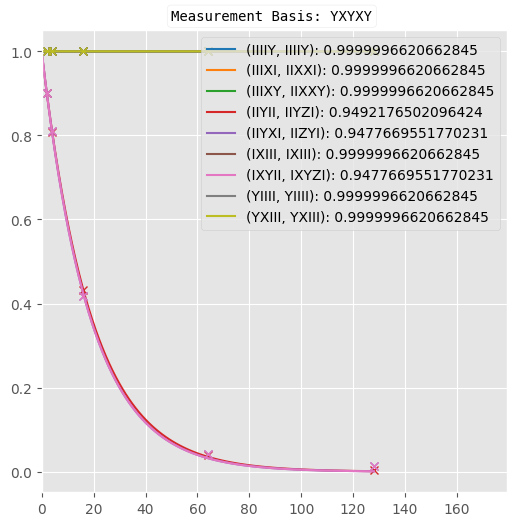

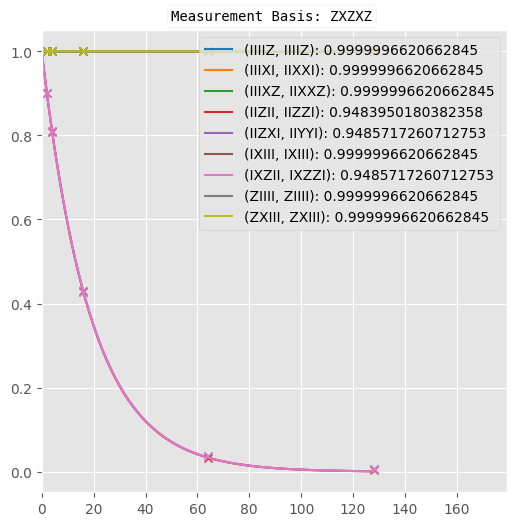

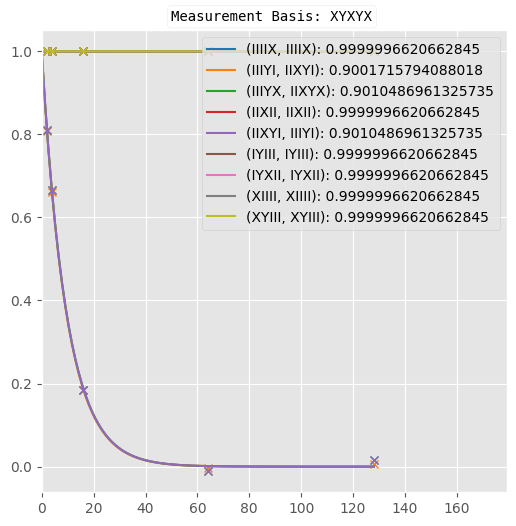

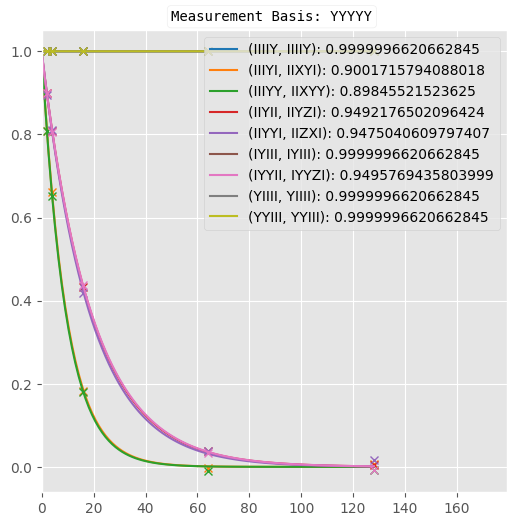

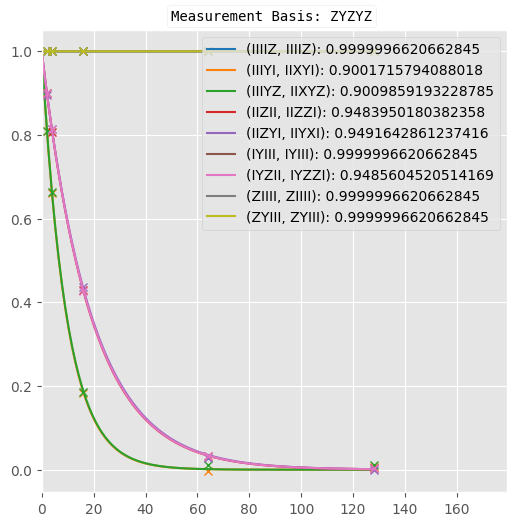

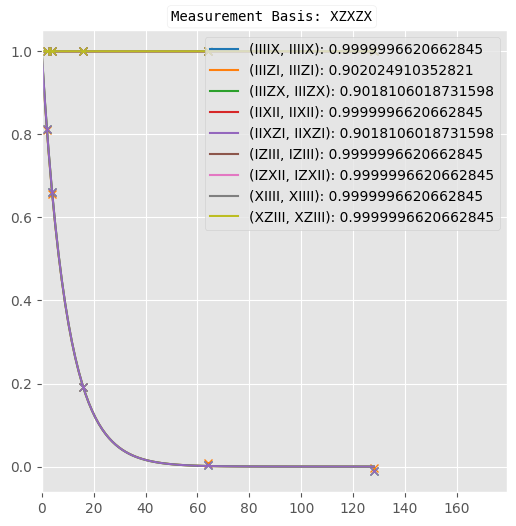

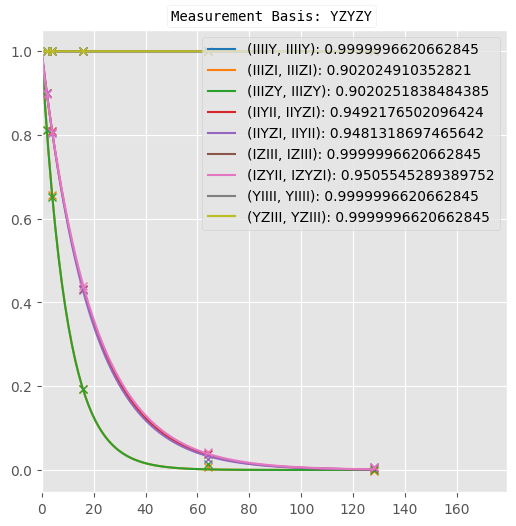

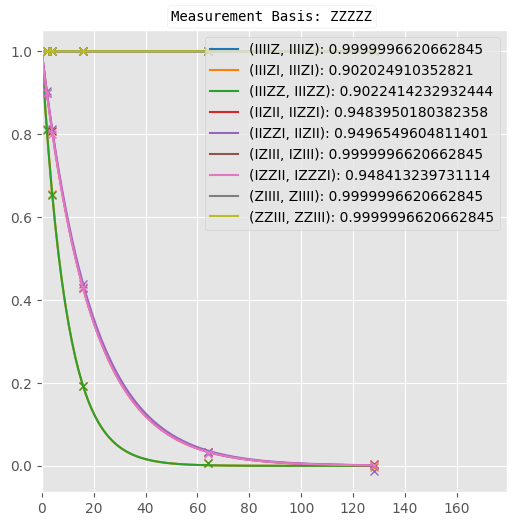

In [103]:
import pickle
with open("termplot.pickle", "rb") as f:
    savefile = pickle.load(f)


    
for basis, paulidic in savefile:
    i=0
    fig, ax = plt.subplots(figsize=(6, 6))
    for pauli, pair in sorted(paulidic, key=lambda o: str(o)):
        a = paulidic[(pauli, pair)]["a"]
        b = paulidic[(pauli, pair)]["b"]
        depths = paulidic[(pauli, pair)]["depth"]
        expectations = paulidic[(pauli, pair)]["expectations"]
        #print((a,b, depths, expectations))
        axis = np.linspace(0,max(depths), 100)
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        ax.plot(depths, expectations, linestyle = 'None', marker = 'x', color = colors[i])
        ax.plot(axis, [a*np.exp(-b*x) for x in axis], color = colors[i], label="(" +str(pauli) + ", " + str(pair) + "): " + str(np.exp(-b)))
        i+=1
    textstr = "Measurement Basis: " +str(basis)
    ax.legend(loc='upper right')
    ax.set_xlim(0, max(depths)* 1.4)
    # Customize the textbox position and appearance
    props = dict(boxstyle='round', facecolor='white', alpha=1)
    #props = dict()

    # Place the textbox in the top-left corner inside the plot (adjust x and y as needed)
    ax.text(50, 1.1, textstr, fontsize=10,
            verticalalignment='top', horizontalalignment='left', bbox=props, family='monospace')
    plt.show()
    